# **Project  - IS 675**



Group members: Natalie Nguyen, Mahaam Ahmed, Natalie Rath


## Table of Contents

1. Introduction

2. Data Preprocessing
  
  2.1 Load the Data

  2.2 Exploratory Data Analysis
      
      * 2.2.1 Summary Statistics

      * 2.2.2 Outliers

      * 2.2.3 Preliminary Data Visualizations
    
          * a. Distribution of Target Variable
          * b. Distribution of categorical variables
          * c. Churn patterns in numeric attributes
          * d. Churn patterns in categorical attributes
    
  2.3 Categorical Variable Encoding

  2.4 Feature Importance

3. Neural Network Model

4. Traditional ML Model
    
    4.1 Decision Tree

    4.2 Random Forest

    4.3 Gradient Boosted Tree




---



## **1. Introduction**

### 1.1 Business Case

Churn refers to the rate at which customers discontinue their subscription to the service. In today's competitive entertainment subscription market, retaining customers is crucial for sustainable growth and profitability. Understanding and predicting customer churn allows businesses to proactively consider measures to be taken, such as targeted marketing campaigns, personalized offers, or service improvements.

### 1.2 Project Overview

The project aims to address the challenge of predicting customer churn in the entertainment subscription industry. We aim to leverage deep learning and machine learning techniques to build an accurate churn prediction model that will assist the company in strategizing and retaining its customer base effectively.

### 1.3 About the Data

The dataset, sourced from Kaggle.com, contains anonymized information of customer subscriptions and their interactions within the service platform. Some of the critical features include subscription types, payment methods, viewing preferences, customer support interactions, and various other relevant attributes. This dataset offers specific insights crucial for the analysis and prediction of churn in entertainment subscription services.

### 1.4 Data Description

| Variable Name              | Variable Type | Data Type | Description                                                                                          |
|--------------------------|-------------|-----------|------------------------------------------------------------------------------------------------------|
| AccountAge               | Feature     | integer   | The age of the user's account in months.                                                             |
| MonthlyCharges           | Feature     | float     | The amount charged to the user on a monthly basis.                                                   |
| TotalCharges             | Feature     | float     | The total charges incurred by the user over the account's lifetime.                                  |
| SubscriptionType         | Feature     | object    | The type of subscription chosen by the user (Basic, Standard, or Premium).                           |
| PaymentMethod            | Feature     | string    | The method of payment used by the user.                                                              |
| PaperlessBilling         | Feature     | string    | Indicates whether the user has opted for paperless billing (Yes or No).                              |
| ContentType              | Feature     | string    | The type of content preferred by the user (Movies, TV Shows, or Both).                               |
| MultiDeviceAccess        | Feature     | string    | Indicates whether the user has access to the service on multiple devices (Yes or No).                |
| DeviceRegistered         | Feature     | string    | The type of device registered by the user (TV, Mobile, Tablet, or Computer).                         |
| ViewingHoursPerWeek      | Feature     | float     | The number of hours the user spends watching content per week.                                       |
| AverageViewingDuration   | Feature     | float     | The average duration of each viewing session in minutes.                                             |
| ContentDownloadsPerMonth | Feature     | integer   | The number of content downloads by the user per month.                                               |
| GenrePreference          | Feature     | string    | The preferred genre of content chosen by the user.                                                   |
| UserRating               | Feature     | float     | The user's rating for the service on a scale of 1 to 5.                                              |
| SupportTicketsPerMonth   | Feature     | integer   | The number of support tickets raised by the user per month.                                          |
| Gender                   | Feature     | string    | The gender of the user (Male or Female).                                                             |
| WatchlistSize            | Feature     | float     | The number of items in the user's watchlist.                                                         |
| ParentalControl          | Feature     | string    | Indicates whether parental control is enabled for the user (Yes or No).                              |
| SubtitlesEnabled         | Feature     | string    | Indicates whether subtitles are enabled for the user (Yes or No).                                    |
| CustomerID               | Identifier  | string    | A unique identifier for each customer.                                                               |
| Churn                    | Target      | integer   | The target variable indicating whether a user has churned or not (1 for churned, 0 for not churned). |



## **2. Data Preprocessing**

### **2.1 Load the data**

In [ ]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# import necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [ ]:
# read train data
train_data=pd.read_csv("/content/drive/Shared drives/IS 675 - Group Project/new data/train.csv")
train_data

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,742.272460,Basic,Mailed check,No,Movies,No,Computer,13.502729,...,47,Sci-Fi,3.697451,1,Male,8,Yes,No,FBZ38J108Z,0
243783,117,13.049257,1526.763053,Premium,Credit card,No,TV Shows,Yes,TV,24.963291,...,35,Comedy,1.449742,4,Male,20,No,No,W4AO1Y6NAI,0
243784,113,14.514569,1640.146267,Premium,Credit card,Yes,TV Shows,No,TV,10.628728,...,44,Action,4.012217,6,Male,13,Yes,Yes,0H3SWWI7IU,0
243785,7,18.140555,126.983887,Premium,Bank transfer,Yes,TV Shows,No,TV,30.466782,...,36,Fantasy,2.135789,7,Female,5,No,Yes,63SJ44RT4A,0


In [ ]:
# read test data
test_data=pd.read_csv("/content/drive/Shared drives/IS 675 - Group Project/new data/test.csv")
test_data

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104475,80,17.348236,1387.858873,Standard,Credit card,No,TV Shows,Yes,Mobile,19.189141,135.445204,35,Comedy,1.411831,7,Female,14,No,Yes,UTKREC613O
104476,20,8.275459,165.509180,Premium,Bank transfer,Yes,Movies,Yes,Mobile,30.986604,114.868640,17,Drama,2.783849,2,Male,8,Yes,No,MDB4E477PS
104477,106,18.134343,1922.240365,Basic,Mailed check,No,Movies,Yes,Computer,7.236303,109.583153,31,Comedy,2.991527,1,Male,12,No,Yes,IPDIA02ZE1
104478,46,19.774010,909.604454,Basic,Bank transfer,No,TV Shows,Yes,TV,25.809285,115.153570,1,Drama,4.998019,0,Female,12,Yes,No,ITLFTPRJGV


View data types:

In [ ]:
# train data types
train_data.dtypes

AccountAge                    int64
MonthlyCharges              float64
TotalCharges                float64
SubscriptionType             object
PaymentMethod                object
PaperlessBilling             object
ContentType                  object
MultiDeviceAccess            object
DeviceRegistered             object
ViewingHoursPerWeek         float64
AverageViewingDuration      float64
ContentDownloadsPerMonth      int64
GenrePreference              object
UserRating                  float64
SupportTicketsPerMonth        int64
Gender                       object
WatchlistSize                 int64
ParentalControl              object
SubtitlesEnabled             object
CustomerID                   object
Churn                         int64
dtype: object

In [ ]:
def convert_to_category_columns(df, columns):
    for col in columns:
        df[col] = df[col].astype('category')
    return df

In [ ]:
categorical_cols = ['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType',
                    'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference',
                    'Gender', 'ParentalControl', 'SubtitlesEnabled', 'Churn']

train_data = convert_to_category_columns(train_data , categorical_cols)

Check for null values:

In [ ]:
train_data.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

### **2.2 Exploratory Data Analysis**

#### **2.2.1 Summary Statistics**

Summary statistics of the train data:

In [ ]:
# summary statistics
def display_sum_stats(data, numerical_cols):
    summary_stats = data[numerical_cols].describe().round(2)
    print(summary_stats.to_string())

# list of numerical variables
numerical_cols = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration',
                  'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize']

summary_statistics = display_sum_stats(train_data, numerical_cols)
summary_statistics

       AccountAge  MonthlyCharges  TotalCharges  ViewingHoursPerWeek  AverageViewingDuration  ContentDownloadsPerMonth  UserRating  SupportTicketsPerMonth  WatchlistSize
count   243787.00       243787.00     243787.00            243787.00               243787.00                 243787.00   243787.00               243787.00      243787.00
mean        60.08           12.49        750.74                20.50                   92.26                     24.50        3.00                    4.50          12.02
std         34.29            4.33        523.07                11.24                   50.51                     14.42        1.16                    2.87           7.19
min          1.00            4.99          4.99                 1.00                    5.00                      0.00        1.00                    0.00           0.00
25%         30.00            8.74        329.15                10.76                   48.38                     12.00        2.00                    

From the summary statistics, below are some highlighted observations:

**1. Account Age:**

* The mean account age is approximately 60 months (5 years), with a wide range from 1 month to 119 months. This variability might suggest a diverse customer base, including both new and long-standing clients.

* For churn prediction, analyzing whether newer customers (with lower account age) have a higher propensity to churn compared to longer-tenured customers can be vital. Understanding if customer loyalty increases with time can impact churn prediction models.

**2. Viewing Hours and Average Viewing Duration:**

* The mean viewing hours per week are roughly 20.5 hours, and the average viewing duration is approximately 92.26 minutes. These metrics illustrate customers' engagement with the service.

* Higher engagement might imply customer satisfaction and could influence churn behavior positively.

**3. Monthly Charges and Total Charges:**

* The mean monthly charge of around $12.49, with a significant standard deviation, indicates variations in subscription plans or usage patterns.

* Higher total charges might imply higher-value customers. Analyzing whether customers with higher monthly or total charges are less likely to churn due to their investment in the service can aid in predicting churn.

#### **2.2.2 Outliers**


From the summary statistics provided, outliers can be identified based on the distribution of values in each numerical attribute.

In [ ]:
# create a box plot for each numerical column
def plot_box_plots(data, numerical_cols):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(7,7))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        ax = axes[i]
        ax.boxplot(data[col], vert=False)
        ax.set_title(col)
        ax.set_xlabel('Value')

    plt.tight_layout()
    plt.show()

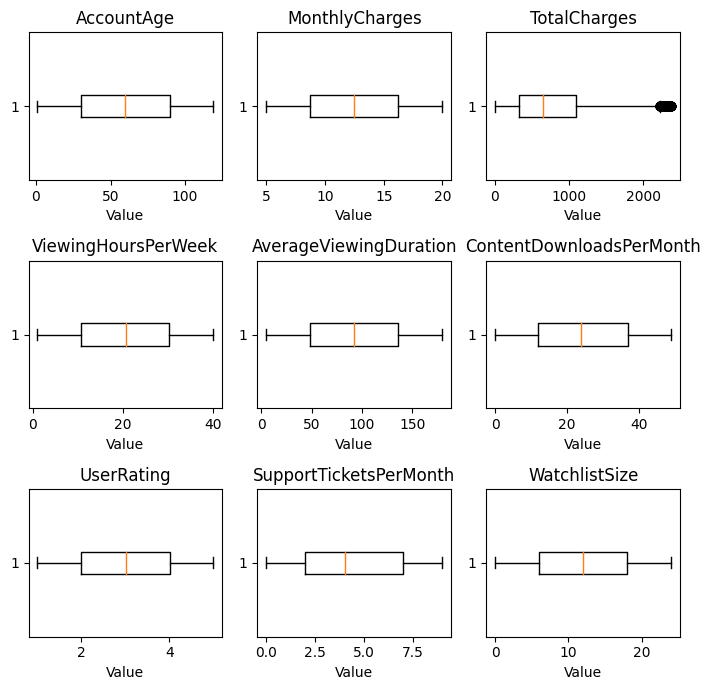

In [ ]:
plot_box_plots(train_data, numerical_cols)

The distribution of most of the numerical attributes are quite balanced, except for `TotalCharges` with some values greater than $2,000. However this might not necessarily be outliers, as `TotalCharges` refers to the total charges incurred by the user over the account's lifetime. If a user is a long-term subscriber, it it likely that their total charges will be higher than that of a recent sign-up.  

#### **2.2.3 Preliminary Data Visualizations**



**a. Distribution of Target Variable**

In [ ]:
def plot_churn_dist(data):
    churn_count = data['Churn'].value_counts()

    plt.figure(figsize=(5, 4))
    plt.bar(churn_count.index.astype(str), churn_count.values)
    plt.title('Churn Distribution')
    plt.xlabel('Churn')
    plt.ylabel('Count')
    plt.xticks(churn_count.index.astype(str))

    # Adding data labels
    for i, count in enumerate(churn_count):
        plt.text(i, count, str(count), ha='center', va='bottom')

    plt.show()

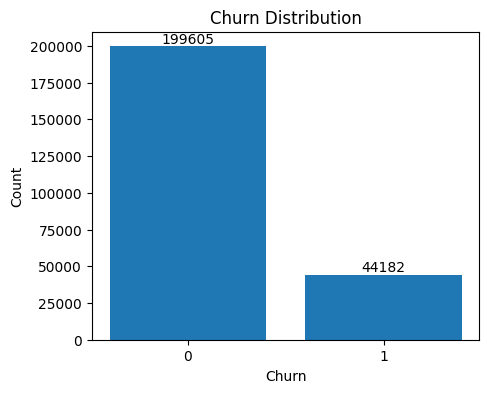

In [ ]:
plot_churn_dist(train_data)

The churn distribution shows an imbalance in the target variable `Churn`. The plot reveals a larger proportion of `0` or `Not Churn` values compared to `1` or `Churn` values (199,605 v. 44,182). The non-churn to churn ratio is roughly 45:1, which indicates a significant class imbalance. This imbalance can severely impact the performance of machine learning models, particularly when predicting the minority class `Churn` in this case.

Imbalanced datasets in churn prediction models can lead to biased results, where the model migh tbe inclined to predict the majority class more frequently due to its prevalence in the data. Specifically, the class imbalance might affect he model's abilities to accurately predict `Churn`, which is crucial in analyzing and understanding customer churn behavior.

To address the class imbalance, there are a few strategies we can consider implementing:

**1. Resampling technique:**

* Oversampling: increasing the number of instances in the minority class by generating synthetic samples to balance the class distribution.

* Undersampling: decreasing the number of instances in the majority class to balance it with the minority class. However, it could lead to information loss.

**2. Performance metrics:**

* Considering other metrics aside from accuracy such as precision, recall, and F-1 score during performance evaluation.

**3. Algorithm selection:**

* Using ensemble methods such as Random Forest, Gradient Boosting, Adaboost that perform well with imbalanced data.

* For traditonal ML models, assign higher weights to the minority class instances in decision tree or SVM models. For neural network model, assign different weights to classes within the data.

**b. Distribution of categorical variables**

Below are the identified categorical variables in out dataset:

* SubscriptionType
* PaymentMethod
* PaperlessBilling
* ContentType
* MultiDeviceAccess
* DeviceRegistered
* GenrePreference
* Gender
* ParentalControl
* SubtitlesEnabled

In [ ]:
categorical_cols = ['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType',
                    'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference',
                    'Gender', 'ParentalControl', 'SubtitlesEnabled']

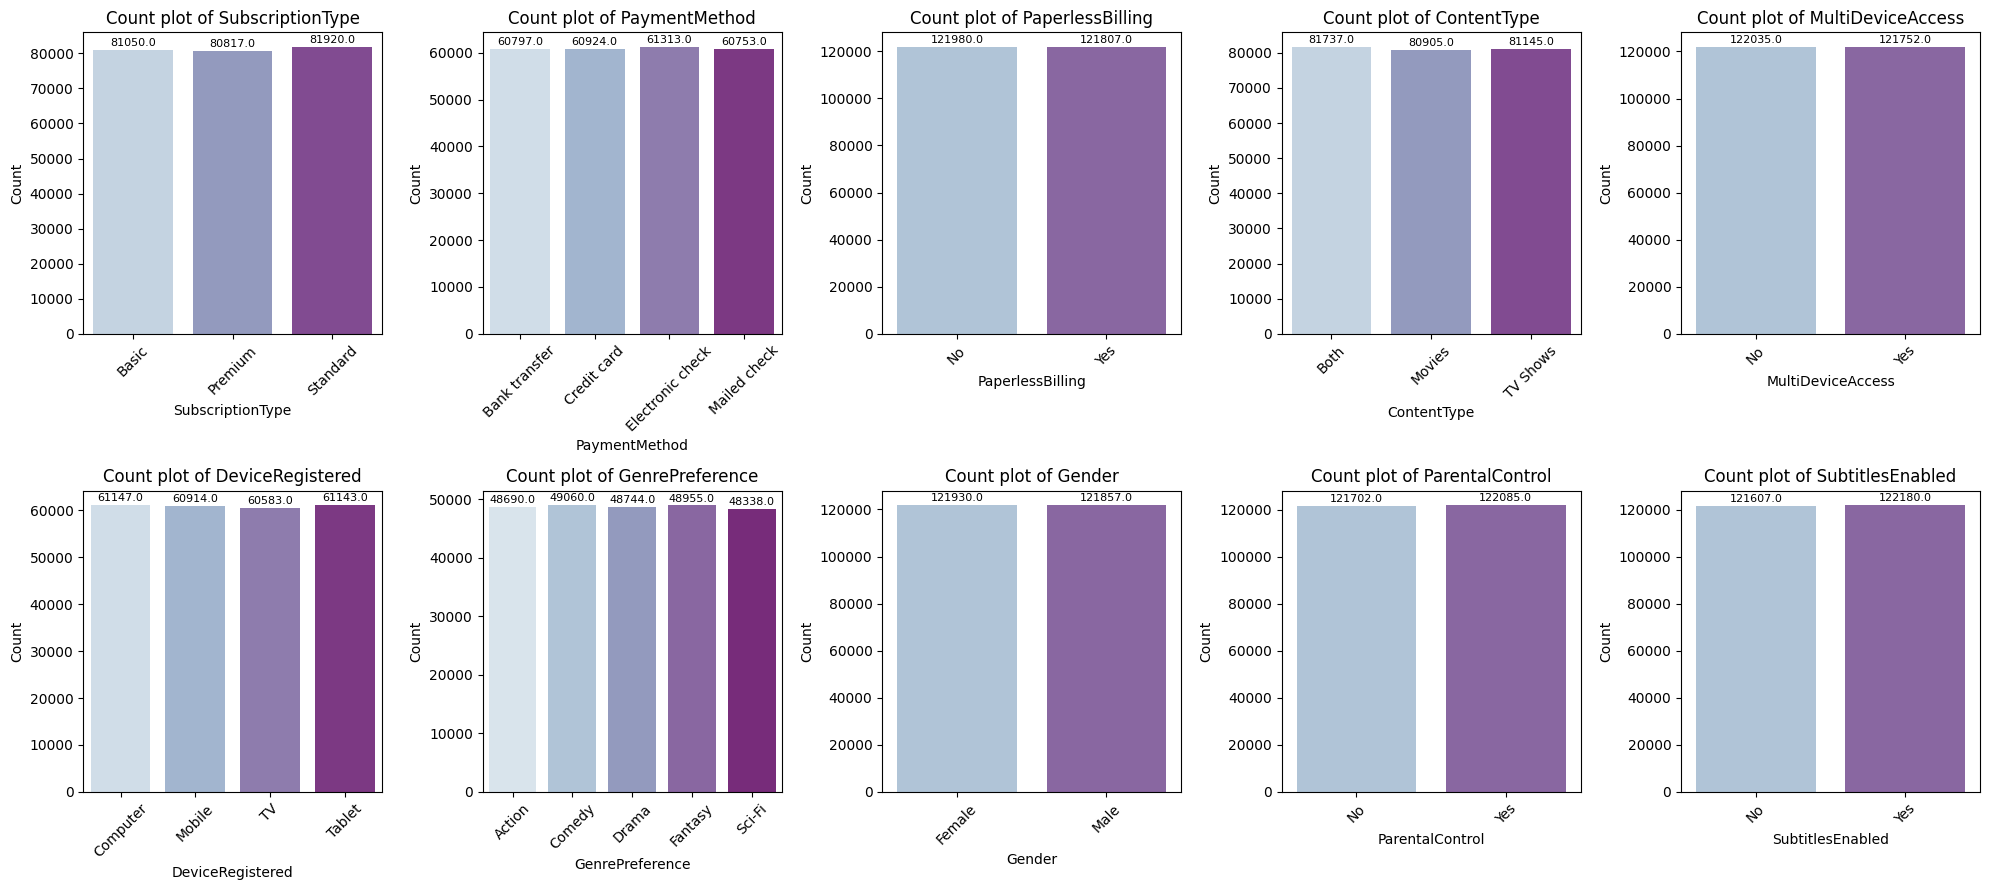

In [ ]:
def plot_categorical_dist(data, categorical_cols):
    num_cols = len(categorical_cols)
    cols = 5
    rows = (num_cols + cols - 1) // cols

    plt.figure(figsize=(20, 9))

    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(rows, cols, i)
        ax = sns.countplot(data=data, x=col, palette='BuPu')
        #  data labels
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                        textcoords='offset points')

        plt.title(f'Count plot of {col}')
        plt.ylabel('Count')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

plot_categorical_dist(train_data, categorical_cols)

From the graphs above, it can be concluded that the distribution of each categorical attributes are quite balanced.



**c. Churn patterns in numeric attributes**

In [ ]:
# list of selected numerical attributes to compare against churn
numerical_attributes = ['AccountAge', 'MonthlyCharges', 'ViewingHoursPerWeek',
                        'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize']

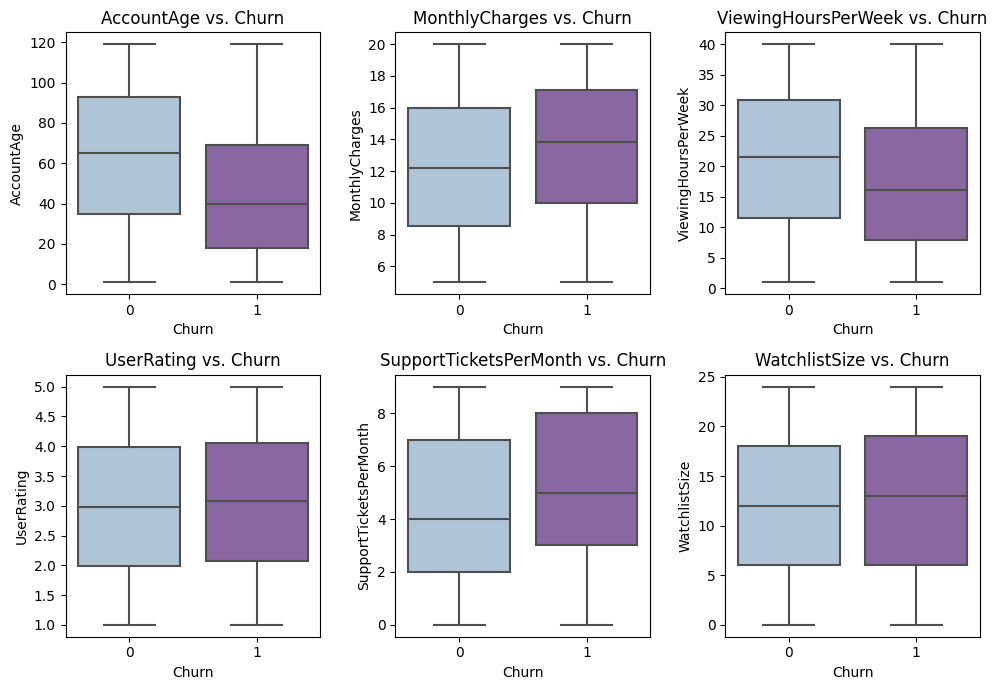

In [ ]:
# box plots of numerical attributes v. churn
def plot_numerical_vs_churn(attributes, data):
    fig, axes = plt.subplots(2, 3, figsize=(10, 7))
    axes = axes.flatten()

    for i, column in enumerate(numerical_attributes):
        sns.boxplot(x='Churn', y=column, data=data, ax=axes[i], palette='BuPu')
        axes[i].set_title(f'{column} vs. Churn')
        axes[i].set_xlabel('Churn')
        axes[i].set_ylabel(column)

    plt.tight_layout()
    plt.show()

plot_numerical_vs_churn(numerical_attributes, train_data)

The visualization of numerical attributes against the 'Churn' variable provides significant insights into potential factors influencing customer churn within the dataset:

**1. Account Age vs. Churn:**

* The relationship suggests that customers with lower account ages are more prone to churn. This might indicate that newer customers tend to discontinue their subscriptions more frequently compared to long-term users. This aligns with the notion that loyal customers are less likely to churn.

**2. Monthly Charges vs. Churn:**

* There is a noticeable trend where customers with higher monthly charges are more likely to churn. This might suggest that customers facing higher costs might be more sensitive to service value and could be more inclined to seek alternatives.

**3. Viewing Hours per Week vs. Churn:**

* The data indicates that churned customers spend less time on the platform per week compared to those who did not churn. This behavior might imply that engagement and usage frequency could influence churn rates, as customers with lower engagement might be more likely to discontinue their subscription.

**4. Support Tickets per Month vs. Churn:**

* Higher volumes of support tickets among churned customers might imply dissatisfaction or issues faced by these users. This could suggest that customer service experiences significantly impact the decision to churn.

**5. User Rating and Watchlist Size vs. Churn:**

* The negligible difference in user rating and watchlist size between churn and non-churn accounts indicates that these factors might not strongly correlate with churn within this dataset. It's possible that these aspects have less impact on customer retention compared to other variables analyzed

**d. Churn patterns in categorical attributes**

In [ ]:
selected_cat_attrs = ['SubscriptionType', 'ContentType', 'GenrePreference',
                      'Gender', 'ParentalControl', 'SubtitlesEnabled']

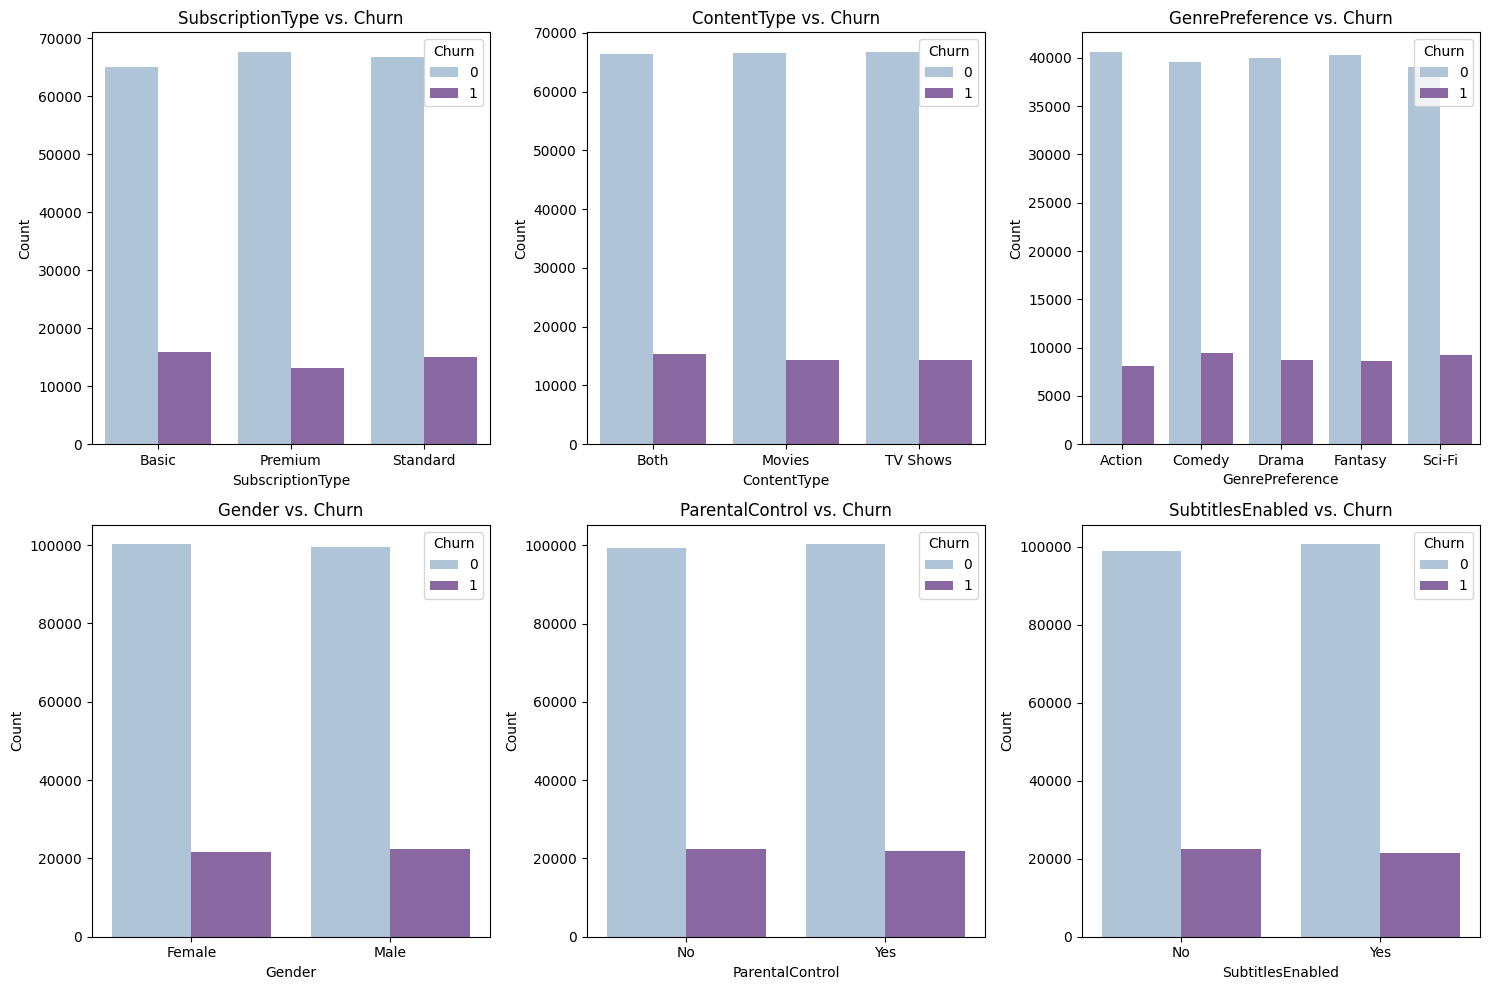

In [ ]:
def plot_categorical_vs_churn(attributes, data):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    for i, column in enumerate(attributes):
        sns.countplot(x=column, hue='Churn', data=data, ax=axes[i], palette='BuPu')
        axes[i].set_title(f'{column} vs. Churn')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Count')
        axes[i].legend(title='Churn', loc='upper right')

    plt.tight_layout()
    plt.show()

plot_categorical_vs_churn(selected_cat_attrs, train_data)

The balanced distribution across categorical variables concerning churn suggests a fairly even representation of customer segments within both churn and non-churn groups. This implies that customers across different categories exhibit comparable tendencies to either stay or churn. However, an even distribution doesn't necessarily mean the absence of a relationship.

### **2.3 Categorical Variable Encoding**

Below are the identified categorical variables in out dataset:

* SubscriptionType
* PaymentMethod
* PaperlessBilling
* ContentType
* MultiDeviceAccess
* DeviceRegistered
* GenrePreference
* Gender
* ParentalControl
* SubtitlesEnabled

In [ ]:
categorical_cols = ['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType',
                       'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender',
                       'ParentalControl', 'SubtitlesEnabled']

In [ ]:
# examine values in categorical variables
for column in categorical_cols:
    values = train_data[column].unique()
    print(f"{column}: {', '.join(map(str, values))}")

SubscriptionType: Premium, Basic, Standard
PaymentMethod: Mailed check, Credit card, Electronic check, Bank transfer
PaperlessBilling: No, Yes
ContentType: Both, Movies, TV Shows
MultiDeviceAccess: No, Yes
DeviceRegistered: Mobile, Tablet, Computer, TV
GenrePreference: Sci-Fi, Action, Fantasy, Drama, Comedy
Gender: Male, Female
ParentalControl: No, Yes
SubtitlesEnabled: No, Yes


#### **Discussion regarding  encoding for categorical variables:**


Given our categorical variables and their values, our encoding method is as follows:

* For variables like `SubscriptionType`, `PaymentMethod`, `ContentType`, `DeviceRegistered`, and `GenrePreference`, where the categories don't have any ordinal relationship, one-hot Encoding would be suitable to prevent any false ranking.

* For binary categorical variables like `PaperlessBilling`, `MultiDeviceAccess`, `ParentalControl`, and `SubtitlesEnabled`, we will directly map 'No' to 0 and 'Yes' to 1. For `Gender` variable, we will map 'Female' to 0 and 'Male' to 1.

**Note: Encoded data will be placed in `train_data_encoded` and `test_data_encoded` variables.**

In [ ]:
def encode_categorical(data, onehot_cols, binary_cols):
    # One-Hot encoding
    encoded_data = pd.get_dummies(data, columns=onehot_cols, drop_first=True)

    # Binary encoding
    binary_map = {'Yes': 1, 'No': 0}
    gender_map = {'Male': 1, 'Female': 0}

    for col in binary_cols:
        if col != 'Gender':
            encoded_data[col] = encoded_data[col].map(binary_map)
        else:
            encoded_data[col] = encoded_data[col].map(gender_map)

    return encoded_data

In [ ]:
# list of variables for one-hot encoding
onehot_cols = ['SubscriptionType', 'PaymentMethod', 'ContentType', 'DeviceRegistered', 'GenrePreference']

# list of binary variables
binary_cols = ['PaperlessBilling', 'MultiDeviceAccess', 'ParentalControl', 'SubtitlesEnabled', 'Gender']

# categorical variable encoding on train data
train_data_encoded = encode_categorical(train_data, onehot_cols, binary_cols)

# categorical variable encoding on test data
test_data_encoded = encode_categorical(test_data, onehot_cols, binary_cols)

In [ ]:
# view encoded train data
pd.set_option('display.max_columns', None)
train_data_encoded.head(20)

,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn,SubscriptionType_Premium,SubscriptionType_Standard,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,ContentType_Movies,ContentType_TV Shows,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi
0,20,11.055215,221.104302,0,0,36.758104,63.531377,10,2.176498,4,1,3,0,0,CB6SXPNVZA,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
1,57,5.175208,294.986882,1,0,32.450568,25.725595,18,3.478632,8,1,23,0,1,S7R2G87O09,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
2,73,12.106657,883.785952,1,0,7.395160,57.364061,23,4.238824,6,1,1,1,1,EASDC20BDT,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,32,7.263743,232.439774,0,0,27.960389,131.537507,30,4.276013,2,1,24,1,1,NPF69NT69N,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0
4,57,16.953078,966.325422,1,0,20.083397,45.356653,20,3.616170,4,0,0,0,0,4LGYPK7VOL,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0
5,113,7.295744,824.419081,1,0,21.678290,97.095746,35,3.721134,8,0,2,1,1,JY5HS0GWHW,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
6,38,12.340675,468.945639,0,0,36.512761,81.782993,28,4.090868,9,0,20,0,1,79XSO6P5O3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,25,7.247550,181.188753,1,0,16.355816,154.521682,10,3.410221,2,0,22,0,0,2LDC9AQ3C5,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0
8,26,19.803233,514.884050,0,0,8.202929,94.375211,28,2.679986,0,1,5,1,1,74DURHL3Y8,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0
9,14,18.842934,263.801080,0,0,38.560694,122.012890,0,2.993441,0,1,18,0,0,CY8S2R3A1T,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
# view encoded test data
test_data_encoded.head()

,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,SubscriptionType_Premium,SubscriptionType_Standard,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,ContentType_Movies,ContentType_TV Shows,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi
0,38,17.869374,679.036195,0,0,29.126308,122.274031,42,3.522724,2,1,23,0,0,O1W6BHP6RM,1,0,0,0,1,0,1,0,1,0,1,0,0,0
1,77,9.912854,763.289768,1,0,36.873729,57.093319,43,2.021545,2,0,22,1,0,LFR4X92X8H,0,0,0,1,0,0,1,0,1,0,0,0,0,0
2,5,15.019011,75.095057,0,1,7.601729,140.414001,14,4.806126,2,0,22,0,1,QM5GBIYODA,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,88,15.357406,1351.451692,0,1,35.586430,177.002419,14,4.943900,0,0,23,1,1,D9RXTK2K9F,0,1,0,1,0,0,0,0,0,1,1,0,0,0
4,91,12.406033,1128.949004,1,1,23.503651,70.308376,6,2.846880,6,0,0,0,0,ENTCCHR1LR,0,1,1,0,0,0,1,0,0,1,0,1,0,0


### **2.4 Normalization**

In [ ]:
predictors = train_data_encoded.drop(['CustomerID', 'Churn'], axis=1)
target = train_data_encoded['Churn']

In [ ]:
# Apply minmax normalization on predictors
min_max_scaler = preprocessing.MinMaxScaler()
predictors_normalized = pd.DataFrame(min_max_scaler.fit_transform(predictors))
predictors_normalized.columns = predictors.columns

In [ ]:
predictors_normalized

,AccountAge,MonthlyCharges,TotalCharges,PaperlessBilling,MultiDeviceAccess,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,SubscriptionType_Premium,SubscriptionType_Standard,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,ContentType_Movies,ContentType_TV Shows,DeviceRegistered_Mobile,DeviceRegistered_TV,DeviceRegistered_Tablet,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi
0,0.161017,0.404346,0.091044,0.0,0.0,0.916881,0.334464,0.204082,0.294124,0.444444,1.0,0.125000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.474576,0.012343,0.122169,1.0,0.0,0.806430,0.118430,0.367347,0.619659,0.888889,1.0,0.958333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.610169,0.474443,0.370216,1.0,0.0,0.163978,0.299222,0.469388,0.809708,0.666667,1.0,0.041667,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.262712,0.151580,0.095819,0.0,0.0,0.691296,0.723074,0.612245,0.819005,0.222222,1.0,1.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.474576,0.797540,0.404988,1.0,0.0,0.489320,0.230608,0.408163,0.654044,0.444444,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,0.644068,0.309992,0.310600,0.0,0.0,0.320584,0.430670,0.959184,0.674364,0.111111,1.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
243783,0.983051,0.537283,0.641088,0.0,1.0,0.614447,0.313247,0.714286,0.112434,0.444444,1.0,0.833333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
243784,0.949153,0.634972,0.688854,1.0,0.0,0.246891,0.978210,0.897959,0.753056,0.666667,1.0,0.541667,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
243785,0.050847,0.876706,0.051393,1.0,0.0,0.755563,0.847925,0.734694,0.283947,0.777778,0.0,0.208333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### **2.5 Feature Selection**

**2.5.1 Feature Importance**

In [ ]:
# Initialize the RF classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier
rf_classifier.fit(predictors_normalized, target)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Store feature names & importance scores
feature_importance_df = pd.DataFrame({'Feature': predictors_normalized.columns, 'Importance': feature_importances})

# Sort features by importance descendingly
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Reset index
feature_importance_df.reset_index(drop=True, inplace=True)

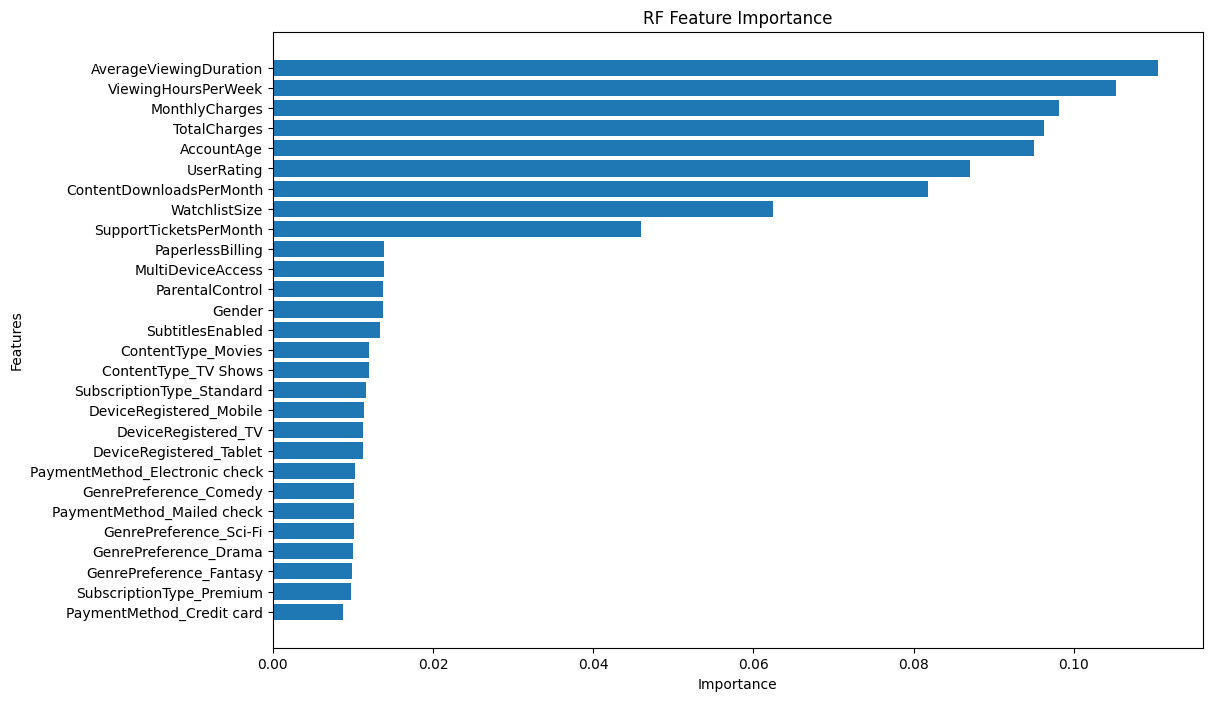

In [ ]:
# Visualize feature importance
plt.figure(figsize=(12,8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('RF Feature Importance')
plt.gca().invert_yaxis()

plt.show()

Threshold > 0.04

In [ ]:
features_to_keep = ['AverageViewingDuration', 'AccountAge', 'ViewingHoursPerWeek',
                    'MonthlyCharges', 'TotalCharges', 'ContentDownloadsPerMonth',
                    'UserRating', 'WatchlistSize', 'SupportTicketsPerMonth']

In [ ]:
predictors_normalized = predictors_normalized[features_to_keep]

In [ ]:
# reset index
predictors_normalized.reset_index(drop=True, inplace=True)
predictors_normalized

,AverageViewingDuration,AccountAge,ViewingHoursPerWeek,MonthlyCharges,TotalCharges,ContentDownloadsPerMonth,UserRating,WatchlistSize,SupportTicketsPerMonth
0,0.334464,0.161017,0.916881,0.404346,0.091044,0.204082,0.294124,0.125000,0.444444
1,0.118430,0.474576,0.806430,0.012343,0.122169,0.367347,0.619659,0.958333,0.888889
2,0.299222,0.610169,0.163978,0.474443,0.370216,0.469388,0.809708,0.041667,0.666667
3,0.723074,0.262712,0.691296,0.151580,0.095819,0.612245,0.819005,1.000000,0.222222
4,0.230608,0.474576,0.489320,0.797540,0.404988,0.408163,0.654044,0.000000,0.444444
...,...,...,...,...,...,...,...,...,...
243782,0.430670,0.644068,0.320584,0.309992,0.310600,0.959184,0.674364,0.333333,0.111111
243783,0.313247,0.983051,0.614447,0.537283,0.641088,0.714286,0.112434,0.833333,0.444444
243784,0.978210,0.949153,0.246891,0.634972,0.688854,0.897959,0.753056,0.541667,0.666667
243785,0.847925,0.050847,0.755563,0.876706,0.051393,0.734694,0.283947,0.208333,0.777778


**2.6.2 Correlation Matrix**

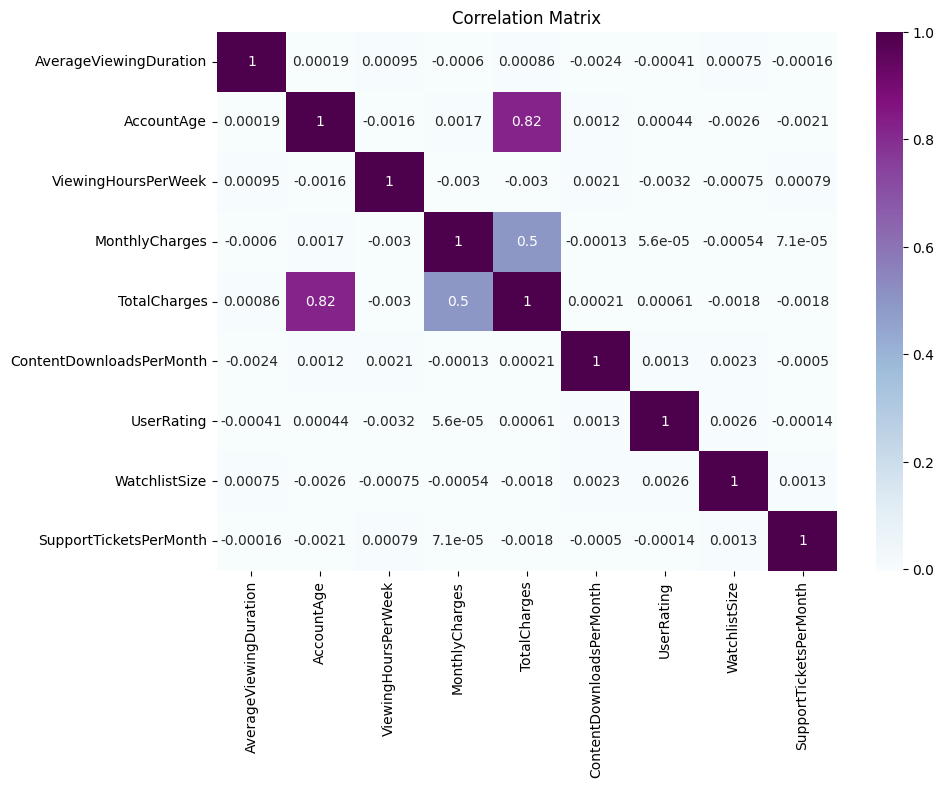

In [ ]:
# correlation matrix
correlation_matrix = predictors_normalized.corr()

# plot
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu')
plt.title('Correlation Matrix')
plt.show()

Total charges has a high correlation with both Account Age and Monthly Charges. So we will get rid of Total Charges.

In [ ]:
predictors_normalized.drop('TotalCharges', axis=1, inplace=True)
predictors_normalized

<ipython-input-35-24f7caa1f8b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictors_normalized.drop('TotalCharges', axis=1, inplace=True)


,AverageViewingDuration,AccountAge,ViewingHoursPerWeek,MonthlyCharges,ContentDownloadsPerMonth,UserRating,WatchlistSize,SupportTicketsPerMonth
0,0.334464,0.161017,0.916881,0.404346,0.204082,0.294124,0.125000,0.444444
1,0.118430,0.474576,0.806430,0.012343,0.367347,0.619659,0.958333,0.888889
2,0.299222,0.610169,0.163978,0.474443,0.469388,0.809708,0.041667,0.666667
3,0.723074,0.262712,0.691296,0.151580,0.612245,0.819005,1.000000,0.222222
4,0.230608,0.474576,0.489320,0.797540,0.408163,0.654044,0.000000,0.444444
...,...,...,...,...,...,...,...,...
243782,0.430670,0.644068,0.320584,0.309992,0.959184,0.674364,0.333333,0.111111
243783,0.313247,0.983051,0.614447,0.537283,0.714286,0.112434,0.833333,0.444444
243784,0.978210,0.949153,0.246891,0.634972,0.897959,0.753056,0.541667,0.666667
243785,0.847925,0.050847,0.755563,0.876706,0.734694,0.283947,0.208333,0.777778


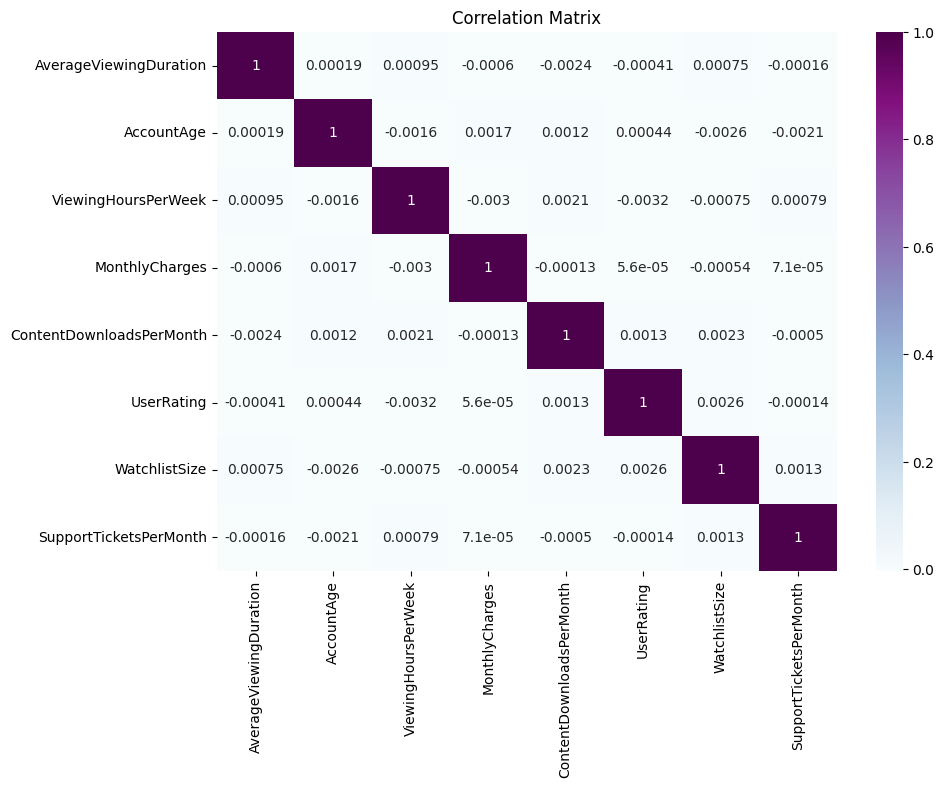

In [ ]:
# correlation matrix
correlation_matrix = predictors_normalized.corr()

# plot
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu')
plt.title('Correlation Matrix')
plt.show()

### **2.5 Balancing the Data**

In [ ]:
# Partition the data
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors_normalized, target, test_size=0.4, random_state=0)
print(f"Shape of Predictors train data: {predictors_train.shape}")
print(f"Shape of Predictors test data: {predictors_test.shape}")
print(f"Shape of Target train data: {target_train.shape}")
print(f"Shape of Target test data: {target_test.shape}")

Shape of Predictors train data: (146272, 8)
Shape of Predictors test data: (97515, 8)
Shape of Target train data: (146272,)
Shape of Target test data: (97515,)


In [ ]:
# Combine predictors_normalized and target into a single DataFrame
combined_train_df = pd.concat([predictors_normalized, target], axis=1)
combined_train_df

,AverageViewingDuration,AccountAge,ViewingHoursPerWeek,MonthlyCharges,ContentDownloadsPerMonth,UserRating,WatchlistSize,SupportTicketsPerMonth,Churn
0,0.334464,0.161017,0.916881,0.404346,0.204082,0.294124,0.125000,0.444444,0
1,0.118430,0.474576,0.806430,0.012343,0.367347,0.619659,0.958333,0.888889,0
2,0.299222,0.610169,0.163978,0.474443,0.469388,0.809708,0.041667,0.666667,0
3,0.723074,0.262712,0.691296,0.151580,0.612245,0.819005,1.000000,0.222222,0
4,0.230608,0.474576,0.489320,0.797540,0.408163,0.654044,0.000000,0.444444,0
...,...,...,...,...,...,...,...,...,...
243782,0.430670,0.644068,0.320584,0.309992,0.959184,0.674364,0.333333,0.111111,0
243783,0.313247,0.983051,0.614447,0.537283,0.714286,0.112434,0.833333,0.444444,0
243784,0.978210,0.949153,0.246891,0.634972,0.897959,0.753056,0.541667,0.666667,0
243785,0.847925,0.050847,0.755563,0.876706,0.734694,0.283947,0.208333,0.777778,0


In [ ]:
# Separate majority and minority classes
majority_df = combined_train_df[combined_train_df['Churn'] == 0]
minority_df = combined_train_df[combined_train_df['Churn'] == 1]

In [ ]:
majority_df.shape

(199605, 9)

In [ ]:
minority_df.shape

(44182, 9)

In [ ]:
# Randomly undersample the majority class
undersampled_majority = majority_df.sample(n=len(minority_df), random_state=42)
undersampled_majority.shape

(44182, 9)

In [ ]:
# Combine the undersampled majority class and the minority class
undersampled_data = pd.concat([undersampled_majority, minority_df])
undersampled_data

,AverageViewingDuration,AccountAge,ViewingHoursPerWeek,MonthlyCharges,ContentDownloadsPerMonth,UserRating,WatchlistSize,SupportTicketsPerMonth,Churn
125422,0.804942,0.728814,0.716750,0.847809,0.959184,0.693970,0.666667,0.555556,0
145441,0.599472,0.898305,0.553891,0.167908,0.857143,0.332040,0.708333,0.777778,0
107565,0.305406,0.372881,0.463276,0.901270,0.693878,0.522537,1.000000,0.888889,0
189926,0.938465,0.652542,0.902866,0.868812,0.489796,0.723503,0.416667,0.222222,0
27089,0.367063,0.635593,0.075956,0.028824,0.530612,0.038314,0.291667,0.333333,0
...,...,...,...,...,...,...,...,...,...
243753,0.243468,0.576271,0.045626,0.728681,0.163265,0.286206,0.541667,0.777778,1
243765,0.821548,0.194915,0.457574,0.317229,0.122449,0.263343,0.583333,0.888889,1
243774,0.322981,0.923729,0.833370,0.111238,0.224490,0.315158,0.916667,0.777778,1
243775,0.453542,0.305085,0.642975,0.662799,0.285714,0.072215,0.250000,0.444444,1


In [ ]:
# Shuffle the combined DataFrame to ensure randomness
balanced_data = undersampled_data.sample(frac=1, random_state=65)

# Split the balanced_data into predictors_train and target_train
predictors_train = balanced_data.drop(columns=['Churn'])
target_train = balanced_data['Churn']

In [ ]:
balanced_data.reset_index(drop=True, inplace=True)
balanced_data

,AverageViewingDuration,AccountAge,ViewingHoursPerWeek,MonthlyCharges,ContentDownloadsPerMonth,UserRating,WatchlistSize,SupportTicketsPerMonth,Churn
0,0.944111,0.177966,0.380808,0.778297,0.632653,0.574795,0.166667,0.888889,1
1,0.951797,0.152542,0.855759,0.423052,0.387755,0.291234,0.250000,0.666667,1
2,0.213527,0.313559,0.700959,0.188434,0.979592,0.266164,1.000000,0.666667,1
3,0.750402,0.194915,0.345941,0.648352,0.653061,0.774980,0.375000,0.888889,1
4,0.616581,0.559322,0.240924,0.508067,0.204082,0.472503,0.125000,0.111111,0
...,...,...,...,...,...,...,...,...,...
88359,0.411827,0.347458,0.329885,0.559709,0.469388,0.722921,0.416667,0.444444,1
88360,0.436066,0.966102,0.427848,0.018153,0.265306,0.443928,0.166667,0.222222,1
88361,0.837802,0.500000,0.520266,0.878423,0.428571,0.353493,0.791667,0.444444,0
88362,0.490727,0.542373,0.791795,0.963182,0.000000,0.383341,0.375000,0.000000,0


In [ ]:
print(f"Training Set - Target Value Counts (Normalized): \n{target_train.value_counts(normalize=True)}\n")
print(f"Training Set - Shape: {target_train.shape}\n")
print(f"Test Set - Target Value Counts (Normalized): \n{target_test.value_counts(normalize=True)}\n")
print(f"Test Set - Shape: {target_test.shape}\n")

Training Set - Target Value Counts (Normalized): 
0    0.5
1    0.5
Name: Churn, dtype: float64

Training Set - Shape: (88364,)

Test Set - Target Value Counts (Normalized): 
0    0.818705
1    0.181295
Name: Churn, dtype: float64

Test Set - Shape: (97515,)



---

## **3. Neural Network Model**


### 3.1 Neural Network Framework

In [ ]:
#Encode label to numeric
label_encoder = preprocessing.LabelEncoder ()
new_label = label_encoder.fit(target_train)
new_label = label_encoder.transform(target_train)

print(target_train[:9], new_label[:9])

106773    1
85055     1
62977     1
187109    1
159577    0
167363    1
157477    1
5997      1
154153    1
Name: Churn, dtype: category
Categories (2, int64): [0, 1] [1 1 1 1 0 1 1 1 1]


In [ ]:
##NNmodel
#import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import random

from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight
from itertools import chain


In [ ]:
# Create tensors from pandas datafrane
predictors_train_tensor = torch.tensor(predictors_train.values)
target_train_tensor = torch.tensor(label_encoder.transform(target_train.values) )
predictors_test_tensor = torch.tensor(predictors_test.values)
target_test_tensor = torch.tensor (label_encoder. transform(target_test.values) )

# Create tensor dataset (set target variable to long int type)
train_dataset = torch.utils.data.TensorDataset(predictors_train_tensor.float(), target_train_tensor.long())
test_dataset = torch.utils.data.TensorDataset(predictors_test_tensor. float() , target_test_tensor.long())

# Define training and testing data loader, and set batch size to 8
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=False)

In [ ]:
# Set seeds for PyTorch, Python random, and NumPy
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)

In [ ]:
# Define the neural network model with one hidden layer as a class
class Classifier(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, activation_func):
        super(Classifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size1),
            activation_func,
            nn.Linear(hidden_size1, hidden_size2),
            activation_func,
            nn.Linear(hidden_size2, output_size)
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
# Define a function to train the model
def train_model(train_loader, test_loader, n_epochs, model, optimizer, loss_fn):
    train_loss_list = []
    test_loss_list = []

    for epoch in range(n_epochs):
        model.train()
        train_loss = 0.0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss_list.append(train_loss / len(train_loader))

        if (epoch == 0) or (epoch == n_epochs - 1) or (epoch % 2 == 0):
            print(f"  -- Epoch {epoch}, Training Loss: {train_loss_list[-1]:.4f}")

        test_loss = evaluate_model(test_loader, model, loss_fn)
        test_loss_list.append(test_loss)

    return train_loss_list, test_loss_list

In [ ]:
# Define a function to evaluate the model
def evaluate_model(data_loader, model, loss_fn):
    model.eval()
    loss = 0.0
    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            loss += loss_fn(outputs, labels).item()
    return loss / len(data_loader)

### 3.2 Hyperparameter Tuning using Random Search

The selected hyperparameter tuning method is Random Search. Below is the ranges/distributions for the hyperparameters to optimize the model.

* Number of neurons (hidden_size): Range from 32 to 512, from which these hyperparameters are randomly sampled during the random search.

* Learning rate: range from 0.0001 to 0.1.

* Activation function: Randomly select one of these activation functions for each model.
    * ReLU:
        * Reason for consideration: ReLU is a widely used activation function that is computationally efficient and helps mitigate the vanishing gradient problem. It introduces non-linearity by outputting zero for negative values and directly passing positive values.

    * Sigmoid:
        * Reason for consideration: Sigmoid function squashes the output between 0 and 1, making it suitable for binary classification tasks as it models the probability of an instance belonging to a class.

    * Tanh:
        * Reason for consideration: Tanh is similar to the sigmoid function but squashes the output between -1 and 1, providing better centering of the data around zero, which might help in learning representations better.


* Optimizer: Randomly select one of these optimizers for each model.
    * SGD optimizer
    * Adam optimizer

In [ ]:
# Define a function to perform Random Search
def random_search(n_search_iterations, n_epochs, train_loader, test_loader):
    best_train_losses = []
    best_test_losses = []
    best_model = None
    best_test_loss = float('inf')
    best_model_index = -1  # Index of the best model in the list

    for i in range(n_search_iterations):
        # Define random hyperparameters
        input_size = len(train_loader.dataset[0][0])
        hidden_size1 = random.choice([32, 64, 128, 256, 512])
        hidden_size2 = random.choice([32, 64, 128, 256, 512])
        output_size = 2 # Number of classes (0 and 1)
        learning_rate = random.choice([0.1, 0.01, 0.001, 0.0001, 0.00001])
        activation_func = random.choice([nn.ReLU(), nn.Sigmoid(), nn.Tanh()])
        optimizer = random.choice([optim.SGD, optim.Adam])

        # Print hyperparameters
        print(f"Hyperparameters {i + 1}: Hidden Size 1: {hidden_size1}, Hidden Size 2: {hidden_size2}, Learning Rate: {learning_rate:.4f}, Activation Function: {activation_func.__class__.__name__}, Optimizer: {optimizer.__name__}")

        # Create and initialize the model
        model = Classifier(input_size, hidden_size1, hidden_size2, output_size, activation_func)

        # Optimizer
        optimizer = optimizer(model.parameters(), lr=learning_rate)

        # Loss function
        loss_fn = nn.CrossEntropyLoss() # Cross-entropy loss for classification

        # Train the model
        train_losses, test_losses = train_model(train_loader, test_loader, n_epochs, model, optimizer, loss_fn)

        # Evaluate the model
        final_test_loss = test_losses[-1]

        # Print test dataset performance
        print(f"  Test Loss: {final_test_loss:.4f}\n")

        # Check if the model has the best test loss so far
        if final_test_loss < best_test_loss:
            best_test_loss = final_test_loss
            best_model = model
            best_model_index = i

        # Store train and test losses for best model
        best_train_losses.append(train_losses)
        best_test_losses.append(test_losses)

    return best_model, best_train_losses, best_test_losses, best_model_index

In [ ]:
# Perform Random Search with 10 search iterations and 10 epochs for each model
n_iterations = 10
n_epochs = 10
best_model, best_train_losses, best_test_losses, best_model_index = random_search(n_iterations,
                                                                                  n_epochs,
                                                                                  train_loader,
                                                                                  test_loader)

Hyperparameters 1: Hidden Size 1: 512, Hidden Size 2: 256, Learning Rate: 0.0010, Activation Function: ReLU, Optimizer: Adam
  -- Epoch 0, Training Loss: 0.6004
  -- Epoch 2, Training Loss: 0.5967


In [ ]:
print(best_model)

Classifier(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=190, bias=True)
    (1): Tanh()
    (2): Linear(in_features=190, out_features=82, bias=True)
    (3): Tanh()
    (4): Linear(in_features=82, out_features=2, bias=True)
  )
)


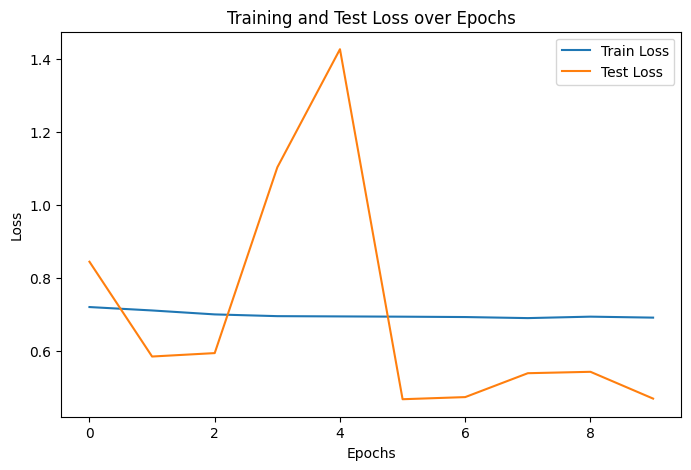

In [ ]:
# Define a function to create a performance chart
def performance_chart(train_losses, test_losses, best_model_index):
    plt.figure(figsize=(8, 5))
    plt.plot(train_losses[best_model_index], label='Train Loss')
    plt.plot(test_losses[best_model_index], label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss over Epochs')
    plt.legend()
    plt.show()

performance_chart(best_train_losses, best_test_losses, best_model_index)

### **3.3 Performance Evaluation**

**3.3.1 Evaluate NN model performance on the train dataset**

In [ ]:
# Set the model to evaluation mode
best_model.eval()

# Collect true and predicted labels for the training set
train_all_labels = []
train_all_preds = []

with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = best_model(inputs)
        _, predicted = torch.max(outputs, 1)
        train_all_labels.extend(labels.numpy())
        train_all_preds.extend(predicted.numpy())

* Confusion Matrix on train data

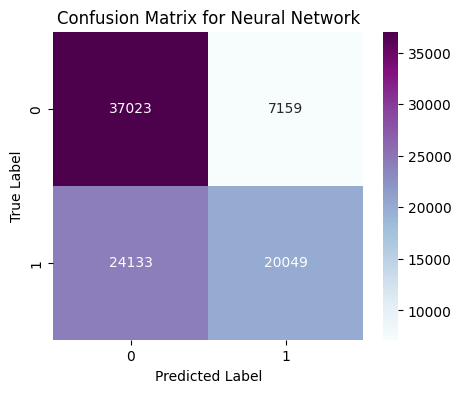

In [ ]:
# plot confusion matrix for train data
train_confusion_matrix  = confusion_matrix(train_all_labels, train_all_preds)

plt.figure(figsize=(5, 4))
sns.heatmap(train_confusion_matrix, annot=True, fmt='d', cmap='BuPu', cbar=True)
plt.title('Confusion Matrix for Neural Network')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

* Classification report on train data

In [ ]:
print('Classification Report for Neural Network - Train Data\n')
print(classification_report(train_all_labels, train_all_preds))

Classification Report for Neural Network - Train Data

              precision    recall  f1-score   support

           0       0.61      0.84      0.70     44182
           1       0.74      0.45      0.56     44182

    accuracy                           0.65     88364
   macro avg       0.67      0.65      0.63     88364
weighted avg       0.67      0.65      0.63     88364



**3.3.2 Evaluate NN model performance on the test dataset**

In [ ]:
# Collect true and predicted labels for the test dataset
test_all_labels = []
test_all_preds = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = best_model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_all_labels.extend(labels.numpy())
        test_all_preds.extend(predicted.numpy())

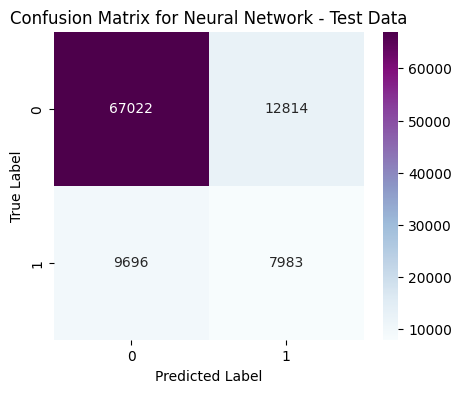

In [ ]:
# plot confusion matrix for test data
test_confusion_matrix  = confusion_matrix(test_all_labels, test_all_preds)

plt.figure(figsize=(5, 4))
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='BuPu', cbar=True)
plt.title('Confusion Matrix for Neural Network - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print('Classification Report for Neural Network - Test Data\n')
print(classification_report(test_all_labels, test_all_preds))

Classification Report for Neural Network - Test Data

              precision    recall  f1-score   support

           0       0.87      0.84      0.86     79836
           1       0.38      0.45      0.41     17679

    accuracy                           0.77     97515
   macro avg       0.63      0.65      0.64     97515
weighted avg       0.78      0.77      0.78     97515



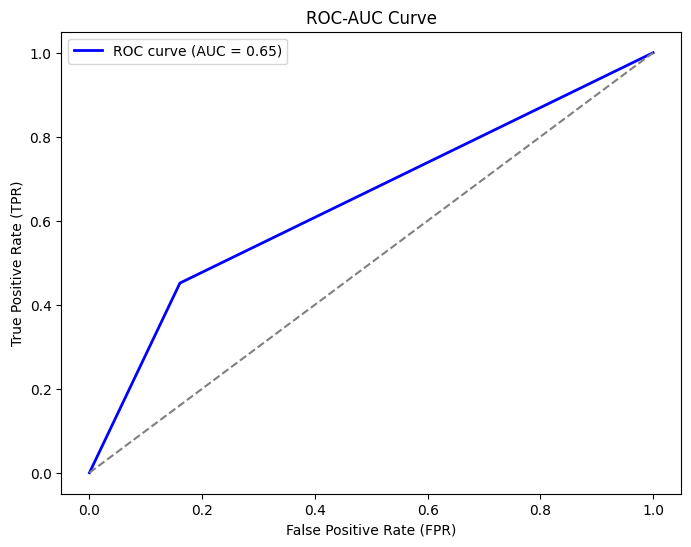

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(test_all_labels, test_all_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-AUC Curve')
plt.legend(loc='upper left')
plt.show()

## **4. Traditional ML Model**

Decision Tree

In [ ]:
#Decision Tree
treemodel= DecisionTreeClassifier(criterion='entropy', random_state=2, max_depth=3, class_weight='balanced')
treemodel.fit(predictors_train, target_train)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, random_state=2)

[Text(0.5, 0.875, 'AccountAge <= 0.496\nentropy = 1.0\nsamples = 88364\nvalue = [44182, 44182]\nclass = Yes'),
 Text(0.25, 0.625, 'AverageViewingDuration <= 0.507\nentropy = 0.972\nsamples = 50020\nvalue = [20077, 29943]\nclass = No'),
 Text(0.125, 0.375, 'ViewingHoursPerWeek <= 0.482\nentropy = 0.914\nsamples = 28276\nvalue = [9304, 18972]\nclass = No'),
 Text(0.0625, 0.125, 'entropy = 0.839\nsamples = 15076\nvalue = [4040, 11036]\nclass = No'),
 Text(0.1875, 0.125, 'entropy = 0.97\nsamples = 13200\nvalue = [5264, 7936]\nclass = No'),
 Text(0.375, 0.375, 'ViewingHoursPerWeek <= 0.433\nentropy = 1.0\nsamples = 21744\nvalue = [10773, 10971]\nclass = No'),
 Text(0.3125, 0.125, 'entropy = 0.977\nsamples = 10466\nvalue = [4296, 6170]\nclass = No'),
 Text(0.4375, 0.125, 'entropy = 0.984\nsamples = 11278\nvalue = [6477, 4801]\nclass = Yes'),
 Text(0.75, 0.625, 'AverageViewingDuration <= 0.466\nentropy = 0.952\nsamples = 38344\nvalue = [24105, 14239]\nclass = Yes'),
 Text(0.625, 0.375, 'Viewi

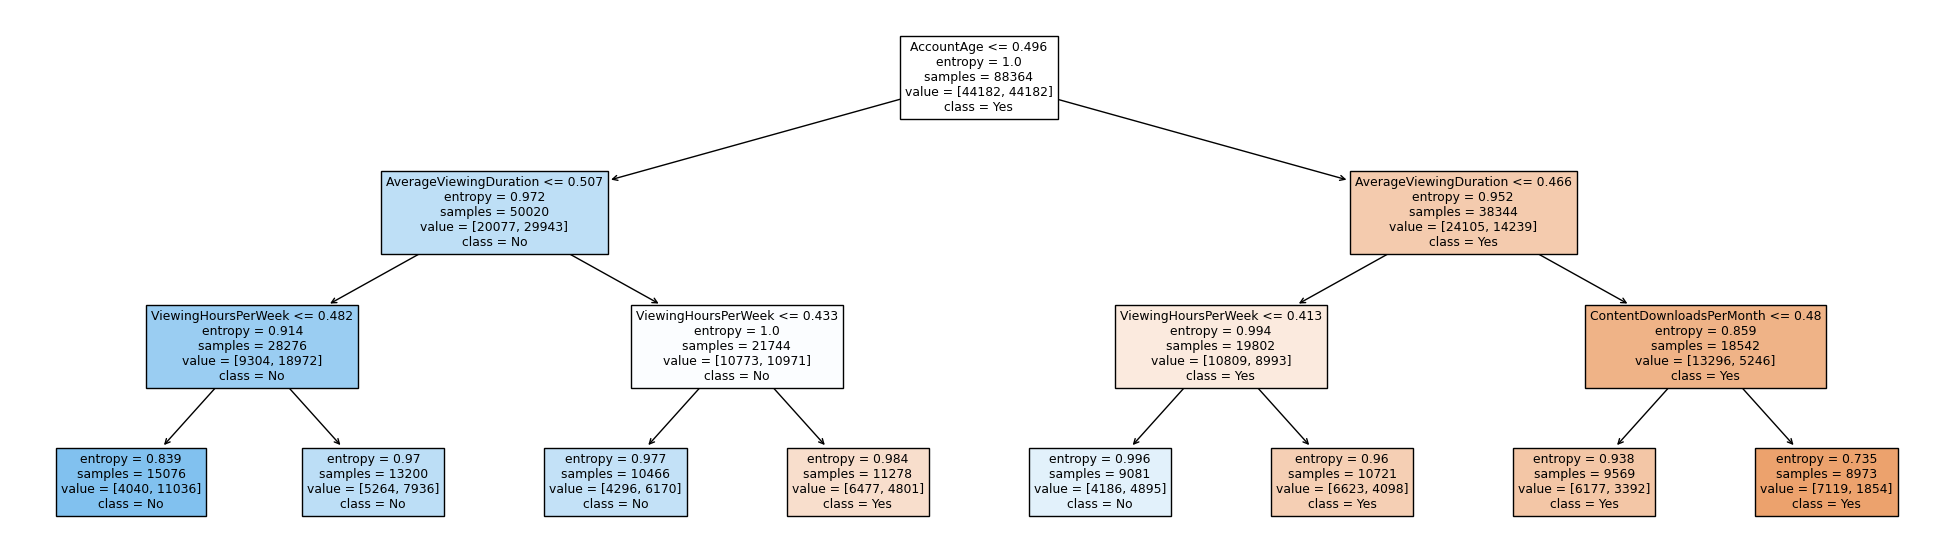

In [ ]:
#Visualize the tree
treeFig= plt.figure(figsize=(25,7))
tree.plot_tree(treemodel, feature_names=list(predictors_train.columns), class_names=['Yes','No'], filled=True)

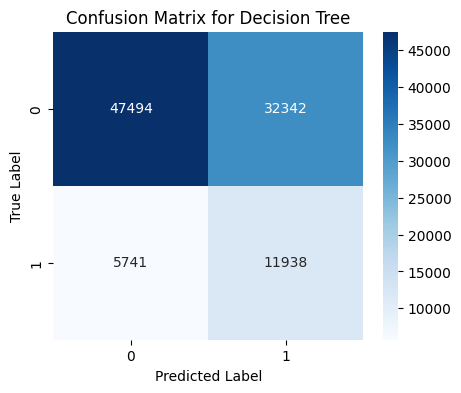

In [ ]:
#Prediction Test
prediction_on_Test_DecTree=treemodel.predict(predictors_test)
cm= confusion_matrix(target_test, prediction_on_Test_DecTree)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(classification_report(target_test, prediction_on_Test_DecTree))

              precision    recall  f1-score   support

           0       0.89      0.59      0.71     79836
           1       0.27      0.68      0.39     17679

    accuracy                           0.61     97515
   macro avg       0.58      0.64      0.55     97515
weighted avg       0.78      0.61      0.65     97515



Random Forest

In [ ]:
rfmodel = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=1, class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(predictors_train, target_train, test_size=0.5, random_state=42)

rfmodel.fit(X_train, y_train)
y_pred = rfmodel.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.67      0.67     22019
           1       0.67      0.66      0.67     22163

    accuracy                           0.67     44182
   macro avg       0.67      0.67      0.67     44182
weighted avg       0.67      0.67      0.67     44182



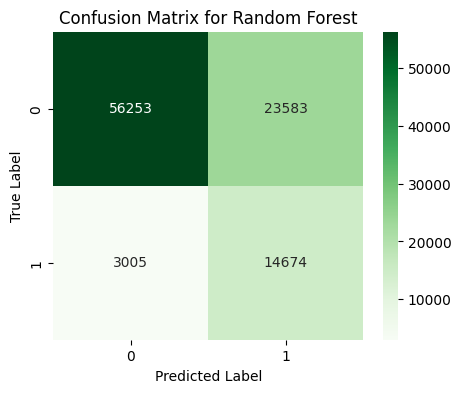

In [ ]:
#Prediction Test
prediction_on_Test_RandForest=rfmodel.predict(predictors_test)
cm= confusion_matrix(target_test, prediction_on_Test_RandForest)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Gradient Boosted Trees (GBT)

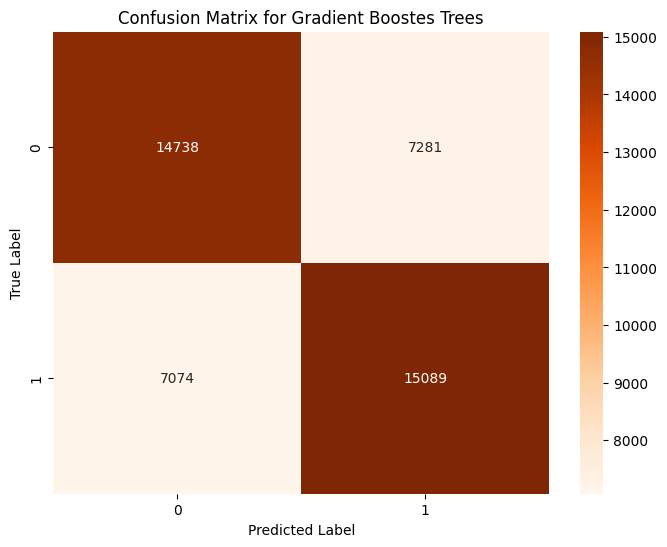

In [ ]:
gbtmodel = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbtmodel.fit(X_train, y_train)
y_pred_gbt = gbtmodel.predict(X_test)

cm= confusion_matrix(y_test, y_pred_gbt)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=True)
plt.title('Confusion Matrix for Gradient Boostes Trees')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Classification Report
class_report_gbt = classification_report(y_test, y_pred_gbt)
print("\nClassification Report:")
print(class_report_gbt)


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.67      0.67     22019
           1       0.67      0.68      0.68     22163

    accuracy                           0.68     44182
   macro avg       0.68      0.68      0.68     44182
weighted avg       0.68      0.68      0.68     44182



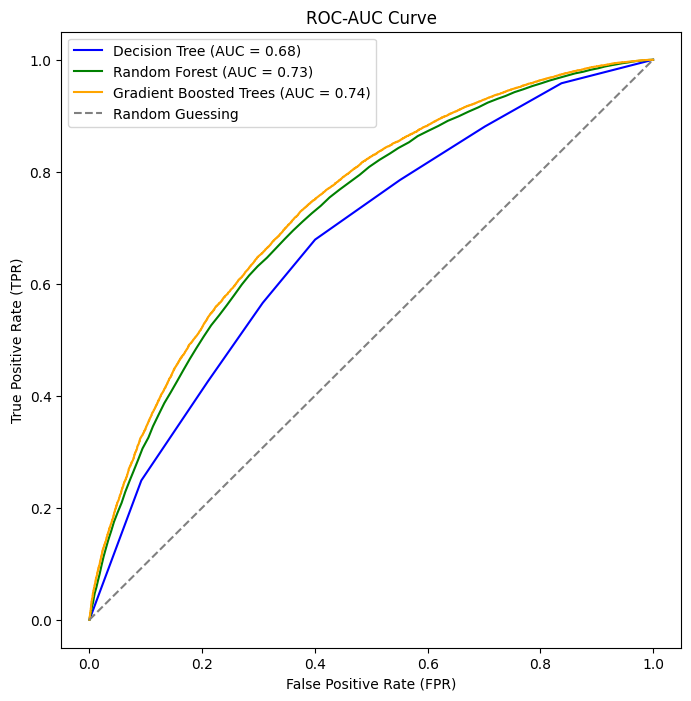

In [ ]:
#For Decision Tree
y_score_tree = treemodel.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_score_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# For Random Forest
y_score_rf = rfmodel.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

#For GBT
y_score_gbt = gbtmodel.predict_proba(X_test)[:, 1]
fpr_gbt, tpr_gbt, _ = roc_curve(y_test, y_score_gbt)
roc_auc_gbt = auc(fpr_gbt, tpr_gbt)


# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='green')
plt.plot(fpr_gbt,tpr_gbt, label= f'Gradient Boosted Trees (AUC = {roc_auc_gbt:.2f})', color='orange')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Customize the plot
plt.title('ROC-AUC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()